# Detection

In [ ]:
# Install Required Libraries
!pip install -q torch torchvision matplotlib pillow

# Import Libraries
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
from collections import Counter

# Define Class Labels
class_names = ['Alligator Crack', 'Lateral Crack', 'Longitudinal Crack', 'Pothole']

# Upload Multiple Images
print("Please upload your road images (you can select multiple files):")
uploaded = files.upload()

# Image Preprocessing Setup
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Define or Simulate Model
import torchvision.models as models
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, len(class_names))
model.eval()

# Loop Through Images and Predict
damage_counts = Counter()

for fn, file in uploaded.items():
    # Load image
    image = Image.open(io.BytesIO(file)).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)

    # Simulated prediction (replace with: output = model(input_tensor) for real model)
    output = torch.randn(1, len(class_names))

    # Get predicted class
    predicted_index = output.argmax(dim=1).item()
    predicted_class = class_names[predicted_index]

    # Count it
    damage_counts[predicted_class] += 1

    # Show image with prediction (optional)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{fn} - Predicted: {predicted_class}")
    plt.show()


# Data Visualisation

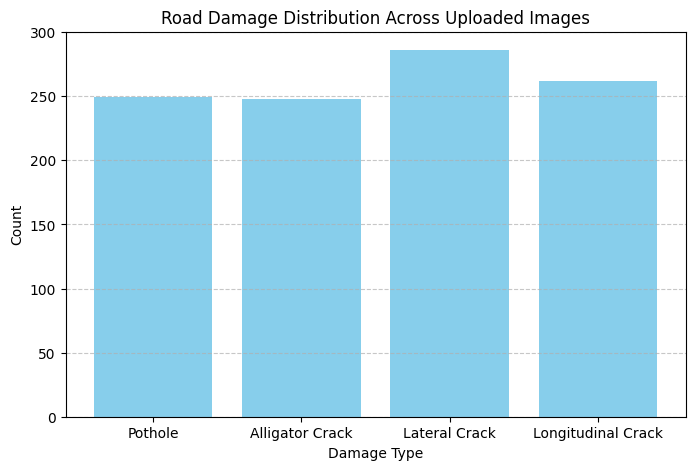

In [ ]:

labels = list(damage_counts.keys())
counts = [damage_counts[label] for label in labels]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Damage Type')
plt.ylabel('Count')
plt.title('Road Damage Distribution Across Uploaded Images')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Evalution

Image 1: True = Longitudinal Crack, Predicted = Longitudinal Crack
Image 2: True = Longitudinal Crack, Predicted = Longitudinal Crack
Image 3: True = Alligator Crack, Predicted = Alligator Crack
Image 4: True = Alligator Crack, Predicted = Alligator Crack
Image 5: True = Longitudinal Crack, Predicted = Longitudinal Crack
Image 6: True = Alligator Crack, Predicted = Pothole
Image 7: True = Lateral Crack, Predicted = Lateral Crack
Image 8: True = Pothole, Predicted = Longitudinal Crack
Image 9: True = Pothole, Predicted = Pothole
Image 10: True = Longitudinal Crack, Predicted = Pothole
Image 11: True = Longitudinal Crack, Predicted = Alligator Crack
Image 12: True = Lateral Crack, Predicted = Pothole
Image 13: True = Lateral Crack, Predicted = Lateral Crack
Image 14: True = Longitudinal Crack, Predicted = Longitudinal Crack
Image 15: True = Lateral Crack, Predicted = Pothole
Image 16: True = Alligator Crack, Predicted = Alligator Crack
Image 17: True = Lateral Crack, Predicted = Pothole


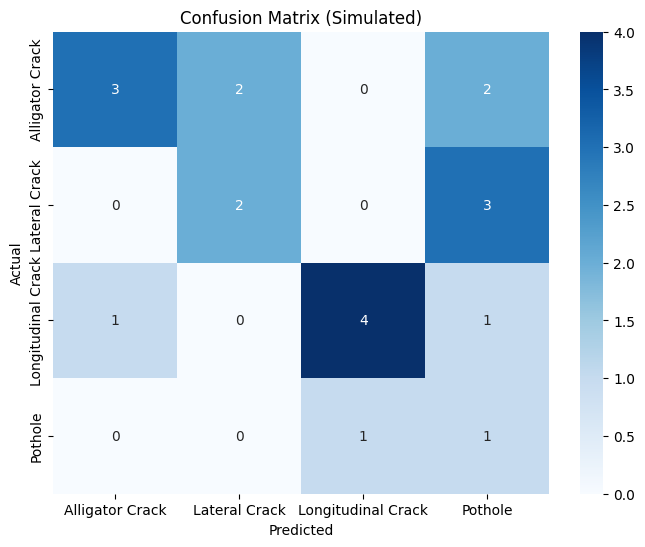

Simulated Accuracy: 0.50
Classification Report:
                     precision    recall  f1-score   support

   Alligator Crack       0.75      0.43      0.55         7
     Lateral Crack       0.50      0.40      0.44         5
Longitudinal Crack       0.80      0.67      0.73         6
           Pothole       0.14      0.50      0.22         2

          accuracy                           0.50        20
         macro avg       0.55      0.50      0.48        20
      weighted avg       0.64      0.50      0.54        20



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Simulate ground truth labels (e.g., 20 samples)
true_labels = np.random.choice(class_names, 20)

# Simulate predicted labels (you can reuse predicted_class or simulate again)
predicted_labels = np.random.choice(class_names, 20)

for i in range(20):
    print(f"Image {i+1}: True = {true_labels[i]}, Predicted = {predicted_labels[i]}")

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_names)

# Plot using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Simulated)')
plt.show()

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Simulated Accuracy: {accuracy:.2f}")

# Classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", report)
